In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.2 MB/s eta 0:00:00


# 명절 기간에 따른 물량 비교
- 2021년 2월(2/12일 설) 데이터 시각화로 데이터를 살펴본 뒤 기간 설정

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/SEND/'
REC_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC/'
REC_SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC_SEND/'
send_df=pd.read_csv(SEND_DATA_PATH+'21_02.csv', encoding='cp949')
rec_df=pd.read_csv(REC_DATA_PATH+'21_02.csv', encoding='cp949')
rec_send_df=pd.read_csv(REC_SEND_DATA_PATH+'21_02.csv', encoding='cp949')

In [ ]:
send_df.columns

Index(['DL_YMD', 'SEND_CTPV_NM', 'SEND_CTPV_CD', 'SEND_CTGG_NM',
       'SEND_CTGG_CD', 'REC_CTPV_NM', 'REC_CTPV_CD', 'E_C_01', 'E_C_02',
       'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09',
       'E_C_10', 'E_C_11'],
      dtype='object')

In [ ]:
send_df['total']=send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)

In [ ]:
rec_df['total']=rec_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_send_df['total']=rec_send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)

In [ ]:
rec_df=rec_df[rec_df['SEND_CTPV_NM'] != '서울특별시']
send_df=send_df[send_df['REC_CTPV_NM'] != '서울특별시']

In [ ]:
df=pd.concat([rec_df,send_df,rec_send_df])

In [ ]:
df.drop(columns=['SEND_CTPV_NM', 'SEND_CTPV_CD', 'SEND_CTGG_NM',
       'SEND_CTGG_CD', 'REC_CTPV_NM', 'REC_CTPV_CD', 'E_C_01', 'E_C_02',
       'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09',
       'E_C_10', 'E_C_11'], inplace=True)

In [ ]:
df_02 = df.groupby('DL_YMD').sum().reset_index()

<ipython-input-12-12ae89e968d6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_02 = df.groupby('DL_YMD').sum().reset_index()


In [ ]:
total=df['total'].sum()
print(total)

48491499.0


In [ ]:
total=df_02['total'].sum()
print(total)

48491499.0


<ipython-input-15-a61960dfb722>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


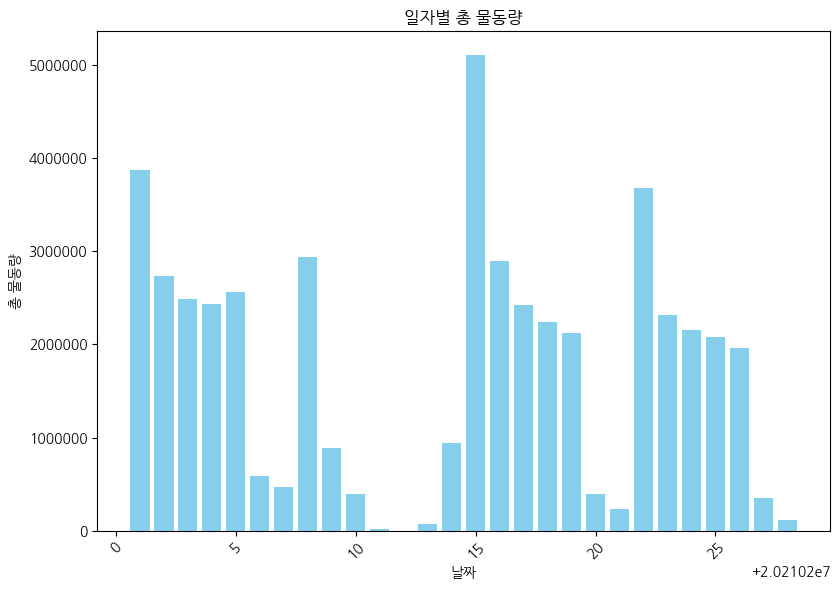

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(df_02['DL_YMD'], df_02['total'], color='skyblue')
plt.xlabel('날짜')
plt.ylabel('총 물동량')
plt.title('일자별 총 물동량')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

## 분석 기간을 늘려서 다시 확인

<ipython-input-16-86e679e73f9d>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('DL_YMD').sum().reset_index()
<ipython-input-16-86e679e73f9d>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


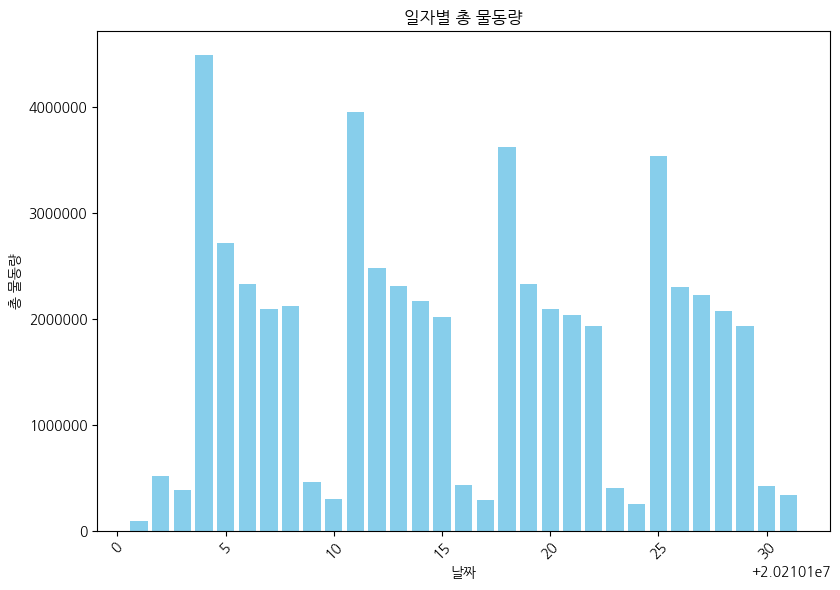

In [ ]:
SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/SEND/'
REC_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC/'
REC_SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC_SEND/'
send_df=pd.read_csv(SEND_DATA_PATH+'21_01.csv', encoding='cp949')
rec_df=pd.read_csv(REC_DATA_PATH+'21_01.csv', encoding='cp949')
rec_send_df=pd.read_csv(REC_SEND_DATA_PATH+'21_01.csv', encoding='cp949')

send_df['total']=send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_df['total']=rec_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_send_df['total']=rec_send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_df=rec_df[rec_df['SEND_CTPV_NM'] != '서울특별시']
send_df=send_df[send_df['REC_CTPV_NM'] != '서울특별시']
df=pd.concat([rec_df,send_df,rec_send_df])
df.drop(columns=['SEND_CTPV_NM', 'SEND_CTPV_CD', 'SEND_CTGG_NM',
       'SEND_CTGG_CD', 'REC_CTPV_NM', 'REC_CTPV_CD', 'E_C_01', 'E_C_02',
       'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09',
       'E_C_10', 'E_C_11'], inplace=True)
df = df.groupby('DL_YMD').sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(df['DL_YMD'], df['total'], color='skyblue')
plt.xlabel('날짜')
plt.ylabel('총 물동량')
plt.title('일자별 총 물동량')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

<ipython-input-17-1d94e12ca59c>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('DL_YMD').sum().reset_index()
<ipython-input-17-1d94e12ca59c>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


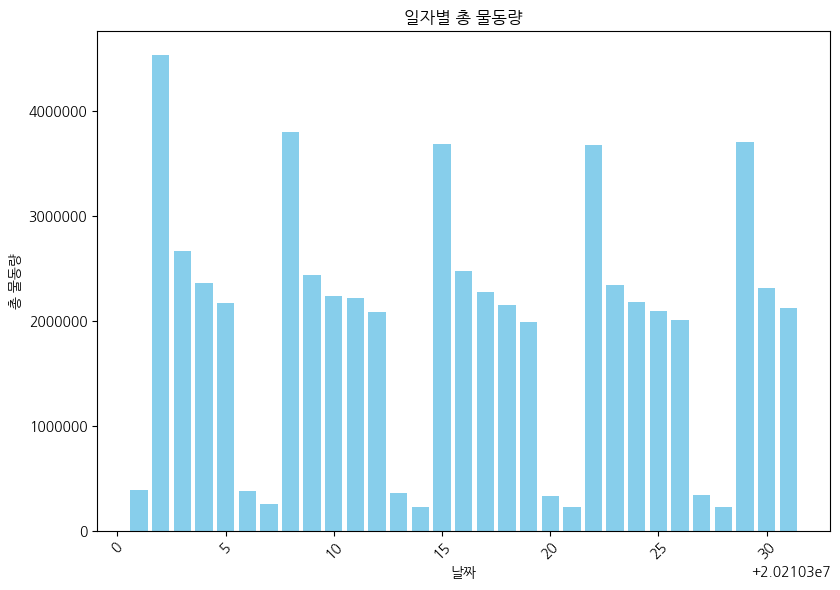

In [ ]:
SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/SEND/'
REC_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC/'
REC_SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC_SEND/'
send_df=pd.read_csv(SEND_DATA_PATH+'21_03.csv', encoding='cp949')
rec_df=pd.read_csv(REC_DATA_PATH+'21_03.csv', encoding='cp949')
rec_send_df=pd.read_csv(REC_SEND_DATA_PATH+'21_03.csv', encoding='cp949')

send_df['total']=send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_df['total']=rec_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_send_df['total']=rec_send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_df=rec_df[rec_df['SEND_CTPV_NM'] != '서울특별시']
send_df=send_df[send_df['REC_CTPV_NM'] != '서울특별시']
df=pd.concat([rec_df,send_df,rec_send_df])
df.drop(columns=['SEND_CTPV_NM', 'SEND_CTPV_CD', 'SEND_CTGG_NM',
       'SEND_CTGG_CD', 'REC_CTPV_NM', 'REC_CTPV_CD', 'E_C_01', 'E_C_02',
       'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09',
       'E_C_10', 'E_C_11'], inplace=True)
df = df.groupby('DL_YMD').sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(df['DL_YMD'], df['total'], color='skyblue')
plt.xlabel('날짜')
plt.ylabel('총 물동량')
plt.title('일자별 총 물동량')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

### 추석 및 추가 데이터 확인

<ipython-input-18-38ec3c19f887>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('DL_YMD').sum().reset_index()
<ipython-input-18-38ec3c19f887>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


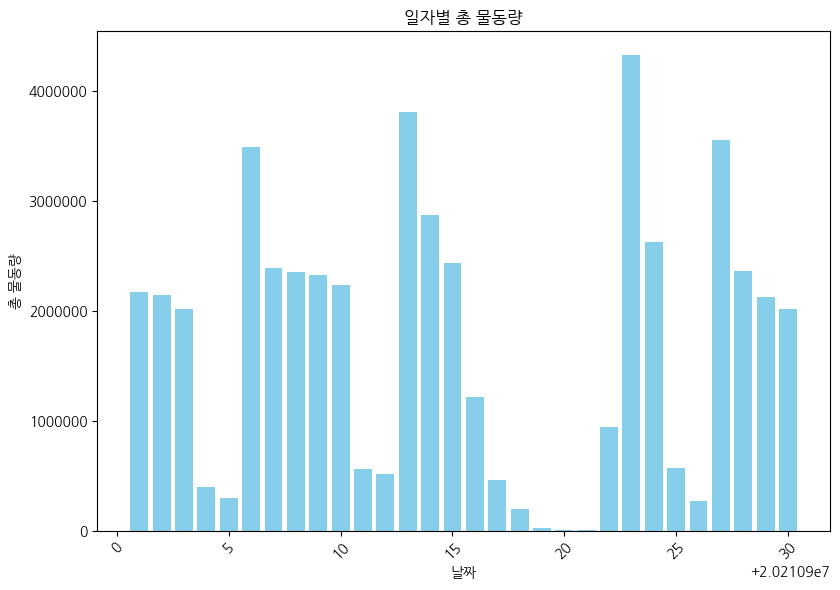

In [ ]:
SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/SEND/'
REC_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC/'
REC_SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC_SEND/'
send_df=pd.read_csv(SEND_DATA_PATH+'21_09.csv', encoding='cp949')
rec_df=pd.read_csv(REC_DATA_PATH+'21_09.csv', encoding='cp949')
rec_send_df=pd.read_csv(REC_SEND_DATA_PATH+'21_09.csv', encoding='cp949')

send_df['total']=send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_df['total']=rec_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_send_df['total']=rec_send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_df=rec_df[rec_df['SEND_CTPV_NM'] != '서울특별시']
send_df=send_df[send_df['REC_CTPV_NM'] != '서울특별시']
df=pd.concat([rec_df,send_df,rec_send_df])
df.drop(columns=['SEND_CTPV_NM', 'SEND_CTPV_CD', 'SEND_CTGG_NM',
       'SEND_CTGG_CD', 'REC_CTPV_NM', 'REC_CTPV_CD', 'E_C_01', 'E_C_02',
       'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09',
       'E_C_10', 'E_C_11'], inplace=True)
df = df.groupby('DL_YMD').sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(df['DL_YMD'], df['total'], color='skyblue')
plt.xlabel('날짜')
plt.ylabel('총 물동량')
plt.title('일자별 총 물동량')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

<ipython-input-19-87c20eeff148>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('DL_YMD').sum().reset_index()
<ipython-input-19-87c20eeff148>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


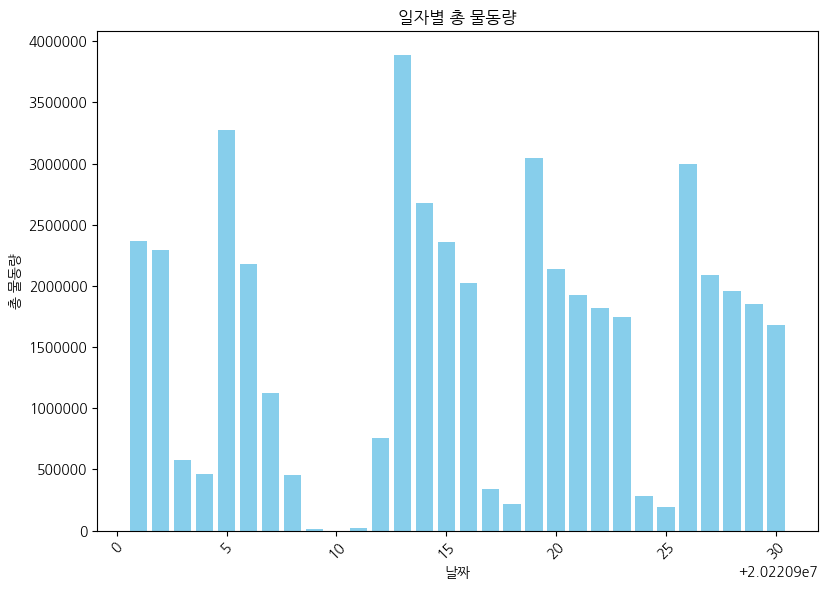

In [ ]:
SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/SEND/'
REC_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC/'
REC_SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC_SEND/'
send_df=pd.read_csv(SEND_DATA_PATH+'22_09.csv', encoding='cp949')
rec_df=pd.read_csv(REC_DATA_PATH+'22_09.csv', encoding='cp949')
rec_send_df=pd.read_csv(REC_SEND_DATA_PATH+'22_09.csv', encoding='cp949')

send_df['total']=send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_df['total']=rec_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_send_df['total']=rec_send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_df=rec_df[rec_df['SEND_CTPV_NM'] != '서울특별시']
send_df=send_df[send_df['REC_CTPV_NM'] != '서울특별시']
df=pd.concat([rec_df,send_df,rec_send_df])
df.drop(columns=['SEND_CTPV_NM', 'SEND_CTPV_CD', 'SEND_CTGG_NM',
       'SEND_CTGG_CD', 'REC_CTPV_NM', 'REC_CTPV_CD', 'E_C_01', 'E_C_02',
       'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09',
       'E_C_10', 'E_C_11'], inplace=True)
df = df.groupby('DL_YMD').sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(df['DL_YMD'], df['total'], color='skyblue')
plt.xlabel('날짜')
plt.ylabel('총 물동량')
plt.title('일자별 총 물동량')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

<ipython-input-20-9b84adcc48b4>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('DL_YMD').sum().reset_index()
<ipython-input-20-9b84adcc48b4>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


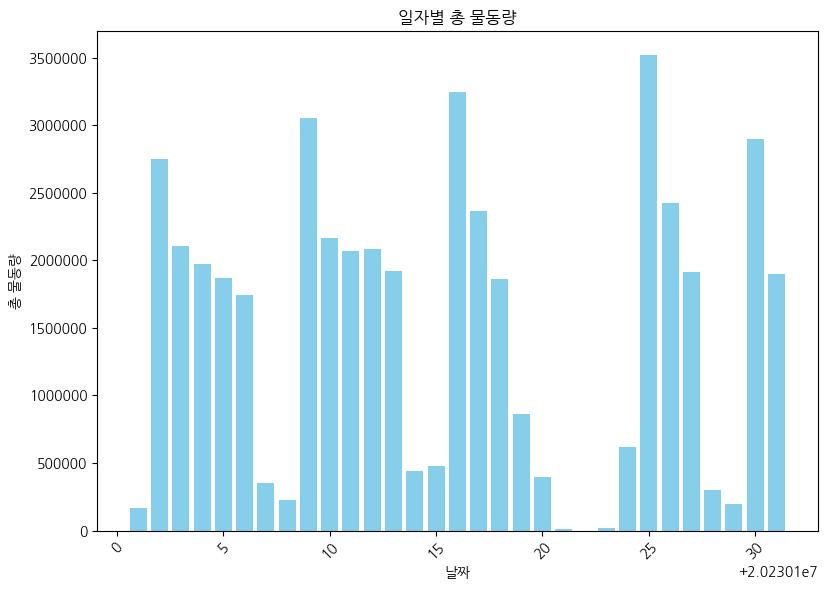

In [ ]:
SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/SEND/'
REC_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC/'
REC_SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC_SEND/'
send_df=pd.read_csv(SEND_DATA_PATH+'23_01.csv', encoding='cp949')
rec_df=pd.read_csv(REC_DATA_PATH+'23_01.csv', encoding='cp949')
rec_send_df=pd.read_csv(REC_SEND_DATA_PATH+'23_01.csv', encoding='cp949')

send_df['total']=send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_df['total']=rec_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_send_df['total']=rec_send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_df=rec_df[rec_df['SEND_CTPV_NM'] != '서울특별시']
send_df=send_df[send_df['REC_CTPV_NM'] != '서울특별시']
df=pd.concat([rec_df,send_df,rec_send_df])
df.drop(columns=['SEND_CTPV_NM', 'SEND_CTPV_CD', 'SEND_CTGG_NM',
       'SEND_CTGG_CD', 'REC_CTPV_NM', 'REC_CTPV_CD', 'E_C_01', 'E_C_02',
       'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09',
       'E_C_10', 'E_C_11'], inplace=True)
df = df.groupby('DL_YMD').sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(df['DL_YMD'], df['total'], color='skyblue')
plt.xlabel('날짜')
plt.ylabel('총 물동량')
plt.title('일자별 총 물동량')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

<ipython-input-21-d2499920b079>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('DL_YMD').sum().reset_index()
<ipython-input-21-d2499920b079>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


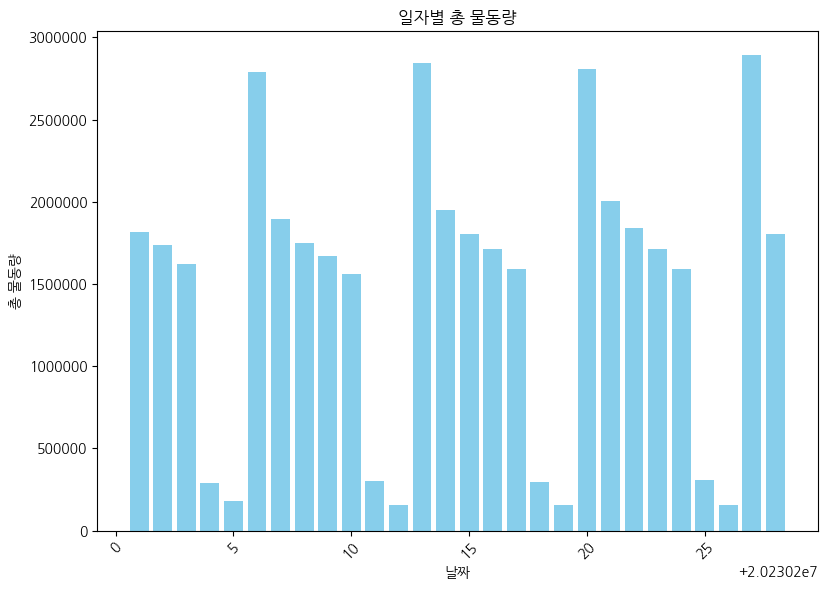

In [ ]:
SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/SEND/'
REC_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC/'
REC_SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC_SEND/'
send_df=pd.read_csv(SEND_DATA_PATH+'23_02.csv', encoding='cp949')
rec_df=pd.read_csv(REC_DATA_PATH+'23_02.csv', encoding='cp949')
rec_send_df=pd.read_csv(REC_SEND_DATA_PATH+'23_02.csv', encoding='cp949')

send_df['total']=send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_df['total']=rec_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_send_df['total']=rec_send_df[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
rec_df=rec_df[rec_df['SEND_CTPV_NM'] != '서울특별시']
send_df=send_df[send_df['REC_CTPV_NM'] != '서울특별시']
df=pd.concat([rec_df,send_df,rec_send_df])
df.drop(columns=['SEND_CTPV_NM', 'SEND_CTPV_CD', 'SEND_CTGG_NM',
       'SEND_CTGG_CD', 'REC_CTPV_NM', 'REC_CTPV_CD', 'E_C_01', 'E_C_02',
       'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09',
       'E_C_10', 'E_C_11'], inplace=True)
df = df.groupby('DL_YMD').sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(df['DL_YMD'], df['total'], color='skyblue')
plt.xlabel('날짜')
plt.ylabel('총 물동량')
plt.title('일자별 총 물동량')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

## 회의 결과
- 명절 전 14일 후 13일을 명절 기간으로 설정, 연간 4주 평균과 비교하기로 함

### 21년 평균 4주 물동량 계산

In [ ]:
SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/SEND/'
dataframes=[]

for i in range (1,13):
  file_name=f'21_{"%02d" % i}.csv'
  temp_df = pd.read_csv(SEND_DATA_PATH+file_name, encoding='cp949')
  dataframes.append(temp_df)

send_21 = pd.concat(dataframes, ignore_index=True)

REC_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC/'
dataframes=[]

for i in range (1,13):
  file_name=f'21_{"%02d" % i}.csv'
  temp_df = pd.read_csv(REC_DATA_PATH+file_name, encoding='cp949')
  dataframes.append(temp_df)

rec_21 = pd.concat(dataframes, ignore_index=True)

REC_SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC_SEND/'
dataframes=[]

for i in range (1,13):
  file_name=f'21_{"%02d" % i}.csv'
  temp_df = pd.read_csv(REC_SEND_DATA_PATH+file_name, encoding='cp949')
  dataframes.append(temp_df)

rec_send_21 = pd.concat(dataframes, ignore_index=True)

send_21=send_21[send_21['REC_CTPV_NM'] != '서울특별시']
rec_21=rec_21[rec_21['SEND_CTPV_NM'] != '서울특별시']

whole_21 = pd.concat([send_21, rec_21, rec_send_21])

In [ ]:
whole_21

,DL_YMD,SEND_CTPV_NM,SEND_CTPV_CD,SEND_CTGG_NM,SEND_CTGG_CD,REC_CTPV_NM,REC_CTPV_CD,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11,REC_CTGG_NM,REC_CTGG_CD
1,20210108,서울특별시,11.0,노원구,11350.0,부산광역시,26.0,60.0,171.0,22.0,66.0,228.0,74.0,127.0,45.0,269.0,96.0,98.0,NaN,NaN
2,20210108,서울특별시,11.0,노원구,11350.0,대구광역시,27.0,42.0,118.0,30.0,52.0,156.0,39.0,118.0,36.0,197.0,52.0,53.0,NaN,NaN
3,20210108,서울특별시,11.0,노원구,11350.0,인천광역시,28.0,73.0,221.0,35.0,65.0,230.0,73.0,162.0,49.0,303.0,80.0,89.0,NaN,NaN
4,20210108,서울특별시,11.0,노원구,11350.0,광주광역시,29.0,22.0,86.0,15.0,36.0,98.0,30.0,81.0,23.0,140.0,39.0,46.0,NaN,NaN
5,20210108,서울특별시,11.0,노원구,11350.0,대전광역시,30.0,37.0,85.0,8.0,31.0,126.0,37.0,71.0,36.0,143.0,48.0,50.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210869,20211224,서울특별시,11.0,용산구,11170.0,서울특별시,11.0,0.0,55.0,28.0,234.0,55.0,5.0,21.0,3.0,37.0,61.0,12.0,관악구,11620.0
210870,20211224,서울특별시,11.0,용산구,11170.0,서울특별시,11.0,6.0,71.0,48.0,358.0,82.0,3.0,19.0,4.0,52.0,60.0,22.0,서초구,11650.0
210871,20211224,서울특별시,11.0,용산구,11170.0,서울특별시,11.0,0.0,130.0,53.0,619.0,107.0,12.0,34.0,7.0,83.0,118.0,27.0,강남구,11680.0
210872,20211224,서울특별시,11.0,용산구,11170.0,서울특별시,11.0,0.0,83.0,77.0,409.0,72.0,13.0,29.0,5.0,74.0,83.0,22.0,송파구,11710.0


In [ ]:
whole_21['total']=whole_21[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
whole_21.drop(columns=['SEND_CTPV_NM', 'SEND_CTPV_CD', 'SEND_CTGG_NM',
       'SEND_CTGG_CD', 'REC_CTPV_NM', 'REC_CTPV_CD', 'E_C_01', 'E_C_02',
       'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09',
       'E_C_10', 'E_C_11'], inplace=True)
whole_21 = whole_21.groupby('DL_YMD').sum().reset_index()


<ipython-input-38-efd3dcb78a58>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  whole_21 = whole_21.groupby('DL_YMD').sum().reset_index()


In [ ]:
whole_21

,DL_YMD,REC_CTGG_CD,total
0,20210101,5880380.0,88942.0
1,20210102,11702015.0,515564.0
2,20210103,10392700.0,379270.0
3,20210104,11702015.0,4489484.0
4,20210105,11702015.0,2718188.0
...,...,...,...
360,20211227,11702015.0,3456839.0
361,20211228,11702015.0,2237686.0
362,20211229,11702015.0,1959642.0
363,20211230,11702015.0,1780811.0


In [ ]:
whole_21['group'] = (whole_21.index // 28) + 1
whole_21['4_week_total'] = whole_21.groupby('group')['total'].transform('sum')

last_group = whole_21['group'].max()
last_group_size = len(whole_21[whole_21['group'] == last_group])

if last_group_size < 28:
    last_group_values = whole_21[whole_21['group'] == last_group]['total'].sum()
    whole_21.loc[whole_21['group'] == last_group, '4_week_total'] = last_group_values
    whole_21 = whole_21[whole_21['group'] != last_group]

whole_21
#whole_21.drop(columns='group', inplace=True)


,DL_YMD,REC_CTGG_CD,total,weekday,group,4_week_total
0,2021-01-01,5880380.0,88942.0,Friday,1,51930087.0
1,2021-01-02,11702015.0,515564.0,Saturday,1,51930087.0
2,2021-01-03,10392700.0,379270.0,Sunday,1,51930087.0
3,2021-01-04,11702015.0,4489484.0,Monday,1,51930087.0
4,2021-01-05,11702015.0,2718188.0,Tuesday,1,51930087.0
...,...,...,...,...,...,...
359,2021-12-26,9762735.0,285225.0,Sunday,13,51059907.0
360,2021-12-27,11702015.0,3456839.0,Monday,13,51059907.0
361,2021-12-28,11702015.0,2237686.0,Tuesday,13,51059907.0
362,2021-12-29,11702015.0,1959642.0,Wednesday,13,51059907.0


#### 21년 요일별 평균 물동량 계산

In [ ]:
whole_21 = whole_21.sort_values('DL_YMD')
whole_21['DL_YMD'] = whole_21['DL_YMD'].astype(str)
whole_21['DL_YMD'] = whole_21['DL_YMD'].apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:])

In [ ]:
whole_21['DL_YMD']=pd.to_datetime(whole_21['DL_YMD'])
whole_21['weekday']=whole_21['DL_YMD'].dt.day_name()
whole_21.head()

,DL_YMD,REC_CTGG_CD,total,weekday
0,2021-01-01,5880380.0,88942.0,Friday
1,2021-01-02,11702015.0,515564.0,Saturday
2,2021-01-03,10392700.0,379270.0,Sunday
3,2021-01-04,11702015.0,4489484.0,Monday
4,2021-01-05,11702015.0,2718188.0,Tuesday


In [ ]:
df_21_week = pd.DataFrame({
    'weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Fri', 'Saturday', 'Sunday']
})
df_21_week = pd.merge(df_21_week, whole_21, on='weekday', how='left')

In [ ]:
mon_21=whole_21.loc[whole_21['weekday']=='Monday', 'total'].mean()
tue_21=whole_21.loc[whole_21['weekday']=='Tuesday', 'total'].mean()
wed_21=whole_21.loc[whole_21['weekday']=='Wednesday', 'total'].mean()
thu_21=whole_21.loc[whole_21['weekday']=='Thursday', 'total'].mean()
fri_21=whole_21.loc[whole_21['weekday']=='Friday', 'total'].mean()
sat_21=whole_21.loc[whole_21['weekday']=='Saturday', 'total'].mean()
sun_21=whole_21.loc[whole_21['weekday']=='Sunday', 'total'].mean()

In [ ]:
fri_21

1884428.576923077

#### 연 평균 데이터에서 연휴 기간과 매칭되는 요일 평균값 제거
- 21년 설 : 목, 금, 토
- 21년 추석 : 월, 화, 수

In [ ]:
df_21_newyear=pd.DataFrame({'4_week_total': [whole_21['4_week_total'].mean()] - fri_21 - thu_21 - sat_21})
df_21_newyear['4_week_total']=round(df_21_newyear['4_week_total'],2)

In [ ]:
df_21_newyear['4_week_total']=round(df_21_newyear['4_week_total'],2)

In [ ]:
df_21_newyear

,4_week_total
0,45121816.52


In [ ]:
df_21_chuseok=pd.DataFrame({'4_week_total': [whole_21['4_week_total'].mean()] - mon_21 - tue_21 - wed_21})
df_21_chuseok['4_week_total']=round(df_21_chuseok['4_week_total'],2)
df_21_chuseok

,4_week_total
0,41707435.81


### 22년 평균 4주 물동량 계산

In [ ]:
SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/SEND/'
dataframes=[]

for i in range (1,13):
  file_name=f'22_{"%02d" % i}.csv'
  temp_df = pd.read_csv(SEND_DATA_PATH+file_name, encoding='cp949')
  dataframes.append(temp_df)

send_22 = pd.concat(dataframes, ignore_index=True)

REC_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC/'
dataframes=[]

for i in range (1,13):
  file_name=f'22_{"%02d" % i}.csv'
  temp_df = pd.read_csv(REC_DATA_PATH+file_name, encoding='cp949')
  dataframes.append(temp_df)

rec_22 = pd.concat(dataframes, ignore_index=True)

REC_SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC_SEND/'
dataframes=[]

for i in range (1,13):
  file_name=f'22_{"%02d" % i}.csv'
  temp_df = pd.read_csv(REC_SEND_DATA_PATH+file_name, encoding='cp949')
  dataframes.append(temp_df)

rec_send_22 = pd.concat(dataframes, ignore_index=True)

send_22=send_22[send_22['REC_CTPV_NM'] != '서울특별시']
rec_22=rec_22[rec_22['SEND_CTPV_NM'] != '서울특별시']

whole_22 = pd.concat([send_22, rec_22, rec_send_22])

In [ ]:
whole_22['total']=whole_22[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
whole_22.drop(columns=['SEND_CTPV_NM', 'SEND_CTPV_CD', 'SEND_CTGG_NM',
       'SEND_CTGG_CD', 'REC_CTPV_NM', 'REC_CTPV_CD', 'E_C_01', 'E_C_02',
       'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09',
       'E_C_10', 'E_C_11'], inplace=True)
whole_22 = whole_22.groupby('DL_YMD').sum().reset_index()


<ipython-input-73-d9c20f99a80e>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  whole_22 = whole_22.groupby('DL_YMD').sum().reset_index()


In [ ]:
whole_22 = whole_22.sort_values('DL_YMD')
whole_22['group'] = (whole_22.index // 28) + 1
whole_22['4_week_total'] = whole_22.groupby('group')['total'].transform('sum')

last_group = whole_22['group'].max()
last_group_size = len(whole_22[whole_22['group'] == last_group])

if last_group_size < 28:
    last_group_values = whole_22[whole_22['group'] == last_group]['total'].sum()
    whole_22.loc[whole_22['group'] == last_group, '4_week_total'] = last_group_values
    whole_22 = whole_22[whole_22['group'] != last_group]

whole_22

,DL_YMD,REC_CTGG_CD,total,group,4_week_total
0,20220101,4602475.0,53361.0,1,44609678.0
1,20220102,8394480.0,239586.0,1,44609678.0
2,20220103,11702015.0,3238859.0,1,44609678.0
3,20220104,11702015.0,2133005.0,1,44609678.0
4,20220105,11702015.0,1959452.0,1,44609678.0
...,...,...,...,...,...
359,20221226,11702015.0,2984060.0,13,47530558.0
360,20221227,11702015.0,2140828.0,13,47530558.0
361,20221228,11702015.0,1953189.0,13,47530558.0
362,20221229,11702015.0,1811142.0,13,47530558.0


#### 22년 요일별 평균 물동량 계산

In [ ]:
whole_22 = whole_22.sort_values('DL_YMD')
whole_22['DL_YMD'] = whole_22['DL_YMD'].astype(str)
whole_22['DL_YMD'] = whole_22['DL_YMD'].apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:])

whole_22['DL_YMD']=pd.to_datetime(whole_22['DL_YMD'])
whole_22['weekday']=whole_22['DL_YMD'].dt.day_name()
whole_22.head()

,DL_YMD,REC_CTGG_CD,total,group,4_week_total,weekday
0,2022-01-01,4602475.0,53361.0,1,44609678.0,Saturday
1,2022-01-02,8394480.0,239586.0,1,44609678.0,Sunday
2,2022-01-03,11702015.0,3238859.0,1,44609678.0,Monday
3,2022-01-04,11702015.0,2133005.0,1,44609678.0,Tuesday
4,2022-01-05,11702015.0,1959452.0,1,44609678.0,Wednesday


In [ ]:
df_22_week = pd.DataFrame({
    'weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Fri', 'Saturday', 'Sunday']
})
df_22_week = pd.merge(df_22_week, whole_22, on='weekday', how='left')

In [ ]:
mon_22=whole_22.loc[whole_22['weekday']=='Monday', 'total'].mean()
tue_22=whole_22.loc[whole_22['weekday']=='Tuesday', 'total'].mean()
wed_22=whole_22.loc[whole_22['weekday']=='Wednesday', 'total'].mean()
thu_22=whole_22.loc[whole_22['weekday']=='Thursday', 'total'].mean()
fri_22=whole_22.loc[whole_22['weekday']=='Friday', 'total'].mean()
sat_22=whole_22.loc[whole_22['weekday']=='Saturday', 'total'].mean()
sun_22=whole_22.loc[whole_22['weekday']=='Sunday', 'total'].mean()

#### 연평균 데이터에서 매칭요일 제거
- 추석 : 금 토 일

In [ ]:
df_22_chuseok=pd.DataFrame({'4_week_total': [whole_22['4_week_total'].mean()] - fri_22 - sat_22 - sun_22})
df_22_chuseok['4_week_total']=round(df_22_chuseok['4_week_total'],2)
df_22_chuseok

,4_week_total
0,42919215.37


### 23년 평균 4주 물동량 계산

In [ ]:
SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/SEND/'
dataframes=[]

for i in range (1,9):
  file_name=f'23_{"%02d" % i}.csv'
  temp_df = pd.read_csv(SEND_DATA_PATH+file_name, encoding='cp949')
  dataframes.append(temp_df)

send_23 = pd.concat(dataframes, ignore_index=True)

REC_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC/'
dataframes=[]

for i in range (1,9):
  file_name=f'23_{"%02d" % i}.csv'
  temp_df = pd.read_csv(REC_DATA_PATH+file_name, encoding='cp949')
  dataframes.append(temp_df)

rec_23 = pd.concat(dataframes, ignore_index=True)

REC_SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC_SEND/'
dataframes=[]

for i in range (1,9):
  file_name=f'23_{"%02d" % i}.csv'
  temp_df = pd.read_csv(REC_SEND_DATA_PATH+file_name, encoding='cp949')
  dataframes.append(temp_df)

rec_send_23 = pd.concat(dataframes, ignore_index=True)

send_23=send_23[send_23['REC_CTPV_NM'] != '서울특별시']
rec_23=rec_23[rec_23['SEND_CTPV_NM'] != '서울특별시']

whole_23 = pd.concat([send_23, rec_23, rec_send_23])

In [ ]:
whole_23['total']=whole_23[['E_C_01', 'E_C_02','E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09','E_C_10', 'E_C_11']].sum(axis=1)
whole_23.drop(columns=['SEND_CTPV_NM', 'SEND_CTPV_CD', 'SEND_CTGG_NM',
       'SEND_CTGG_CD', 'REC_CTPV_NM', 'REC_CTPV_CD', 'E_C_01', 'E_C_02',
       'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09',
       'E_C_10', 'E_C_11'], inplace=True)
whole_23 = whole_23.groupby('DL_YMD').sum().reset_index()


<ipython-input-84-5da3c3e99766>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  whole_23 = whole_23.groupby('DL_YMD').sum().reset_index()


In [ ]:
whole_23 = whole_23.sort_values('DL_YMD')
whole_23['group'] = (whole_23.index // 28) + 1
whole_23['4_week_total'] = whole_23.groupby('group')['total'].transform('sum')

last_group = whole_23['group'].max()
last_group_size = len(whole_23[whole_23['group'] == last_group])

if last_group_size < 28:
    last_group_values = whole_23[whole_23['group'] == last_group]['total'].sum()
    whole_23.loc[whole_23['group'] == last_group, '4_week_total'] = last_group_values
    whole_23 = whole_23[whole_23['group'] != last_group]

whole_23

,DL_YMD,REC_CTGG_CD,total,group,4_week_total
0,20230101,7778505.0,167769.0,1,40947342.0
1,20230102,11702015.0,2748496.0,1,40947342.0
2,20230103,11702015.0,2109837.0,1,40947342.0
3,20230104,11702015.0,1970046.0,1,40947342.0
4,20230105,11702015.0,1866089.0,1,40947342.0
...,...,...,...,...,...
219,20230808,11702015.0,1839998.0,8,39477920.0
220,20230809,11702015.0,1637662.0,8,39477920.0
221,20230810,11702015.0,1470611.0,8,39477920.0
222,20230811,11702015.0,1431822.0,8,39477920.0


#### 23년 요일별 평균 물동량 계산

In [ ]:
whole_23 = whole_23.sort_values('DL_YMD')
whole_23['DL_YMD'] = whole_23['DL_YMD'].astype(str)
whole_23['DL_YMD'] = whole_23['DL_YMD'].apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:])

whole_23['DL_YMD']=pd.to_datetime(whole_23['DL_YMD'])
whole_23['weekday']=whole_23['DL_YMD'].dt.day_name()
whole_23.head()

df_23_week = pd.DataFrame({
    'weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Fri', 'Saturday', 'Sunday']
})
df_23_week = pd.merge(df_23_week, whole_23, on='weekday', how='left')

mon_23=whole_23.loc[whole_23['weekday']=='Monday', 'total'].mean()
tue_23=whole_23.loc[whole_23['weekday']=='Tuesday', 'total'].mean()
wed_23=whole_23.loc[whole_23['weekday']=='Wednesday', 'total'].mean()
thu_23=whole_23.loc[whole_23['weekday']=='Thursday', 'total'].mean()
fri_23=whole_23.loc[whole_23['weekday']=='Friday', 'total'].mean()
sat_23=whole_23.loc[whole_23['weekday']=='Saturday', 'total'].mean()
sun_23=whole_23.loc[whole_23['weekday']=='Sunday', 'total'].mean()

#### 연평균 데이터에서 매칭요일 제거
- 설날 : 토 일 월 화

In [ ]:
df_23_newyear=pd.DataFrame({'4_week_total': [whole_23['4_week_total'].mean()] - mon_23 - sat_23 - sun_23 - tue_23})
df_23_newyear['4_week_total']=round(df_23_newyear['4_week_total'],2)
df_23_newyear

,4_week_total
0,36117125.69


## 1년 평균 물동량과 명절기간 비교

### 21년 설 기간 (1/19~2/24) 총 물동량 계산

In [ ]:
new_year = whole_21[(whole_21['DL_YMD']>'2021-01-18')&(whole_21['DL_YMD']<'2021-02-25')].copy()

In [ ]:
new_year['new_year_total']=new_year['total'].sum()

<ipython-input-64-04ce54552380>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


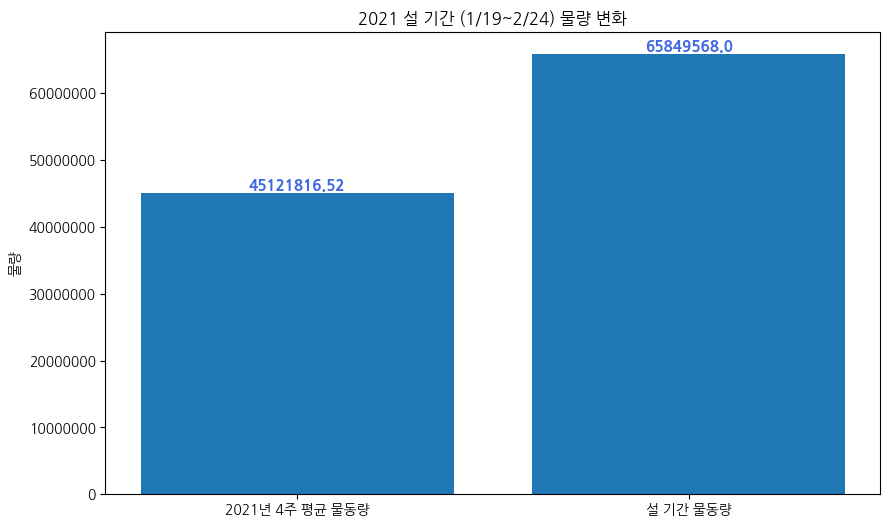

In [ ]:
import numpy as np
values = [
    df_21_newyear['4_week_total'].values,
    new_year['new_year_total'].values
    ]


plt.figure(figsize=(10, 6))
x = np.arange(len(values))
plt.bar(x, [val[0] for val in values])
plt.title('2021 설 기간 (1/19~2/24) 물량 변화')



for i, v in enumerate(values):
    plt.text(i, v[0], str(v[0]), fontsize=11, fontweight='bold', color='royalblue', ha='center', va='bottom')

plt.ylabel('물량')
plt.xticks(x, ['2021년 4주 평균 물동량', '설 기간 물동량'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

### 21년 추석 기간 (9/7~10/03) 총 물동량 계산

<ipython-input-70-8dec763030fc>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


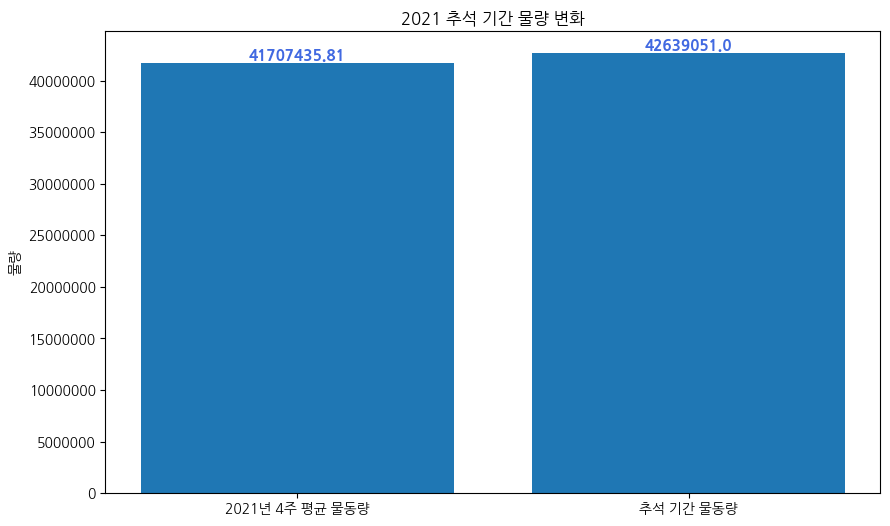

In [ ]:
chuseok = whole_21[(whole_21['DL_YMD']>'2021-09-06')&(whole_21['DL_YMD']<'2021-10-04')].copy()
chuseok['chuseok_total']=chuseok['total'].sum()
values = [
    df_21_chuseok['4_week_total'].values,
    chuseok['chuseok_total'].values
    ]


plt.figure(figsize=(10, 6))
x = np.arange(len(values))
plt.bar(x, [val[0] for val in values])
plt.title('2021 추석 기간 물량 변화')



for i, v in enumerate(values):
    plt.text(i, v[0], str(v[0]), fontsize=11, fontweight='bold', color='royalblue', ha='center', va='bottom')

plt.ylabel('물량')
plt.xticks(x, ['2021년 4주 평균 물동량', '추석 기간 물동량'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

### 22년 추석 기간 (8/27~9/22) 총 물동량 계산

<ipython-input-81-26ceae2f1ec5>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


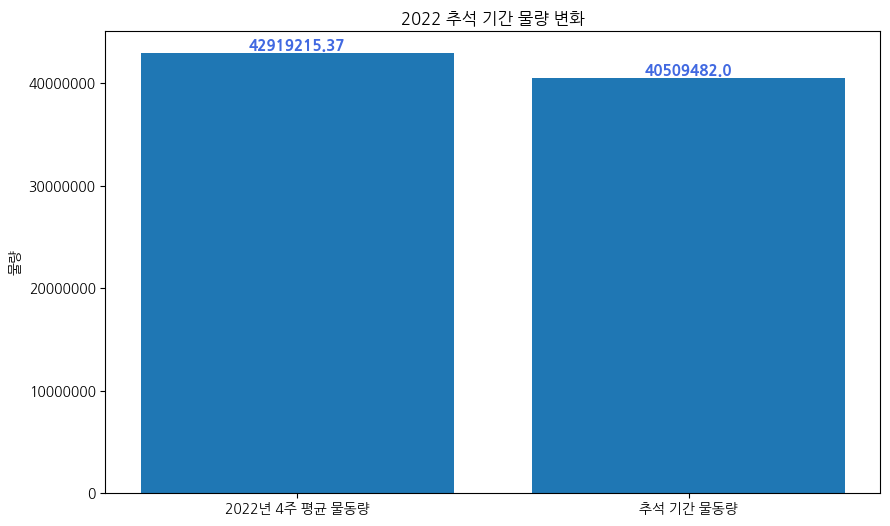

In [ ]:
chuseok = whole_22[(whole_22['DL_YMD']>'2022-08-26')&(whole_22['DL_YMD']<'2022-09-22')].copy()
chuseok['chuseok_total']=chuseok['total'].sum()
values = [
    df_22_chuseok['4_week_total'].values,
    chuseok['chuseok_total'].values
    ]


plt.figure(figsize=(10, 6))
x = np.arange(len(values))
plt.bar(x, [val[0] for val in values])
plt.title('2022 추석 기간 물량 변화')



for i, v in enumerate(values):
    plt.text(i, v[0], str(v[0]), fontsize=11, fontweight='bold', color='royalblue', ha='center', va='bottom')

plt.ylabel('물량')
plt.xticks(x, ['2022년 4주 평균 물동량', '추석 기간 물동량'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

###23년 설 기간(1/8~2/3) 총 물동량 계산

<ipython-input-90-7489d0ffdb21>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


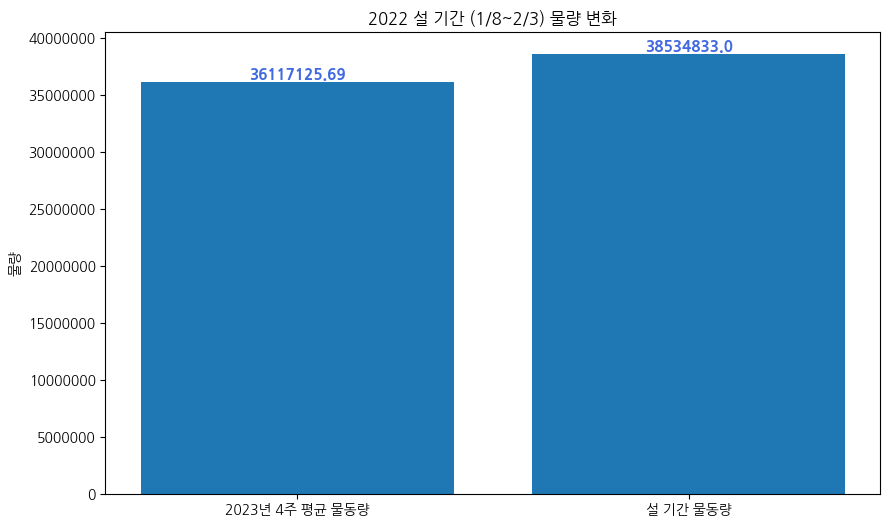

In [ ]:
new_year = whole_23[(whole_23['DL_YMD']>'2023-01-07')&(whole_23['DL_YMD']<'2023-02-03')].copy()
new_year['new_year_total']=new_year['total'].sum()

values = [
    df_23_newyear['4_week_total'].values,
    new_year['new_year_total'].values
    ]


plt.figure(figsize=(10, 6))
x = np.arange(len(values))
plt.bar(x, [val[0] for val in values])
plt.title('2022 설 기간 (1/8~2/3) 물량 변화')



for i, v in enumerate(values):
    plt.text(i, v[0], str(v[0]), fontsize=11, fontweight='bold', color='royalblue', ha='center', va='bottom')

plt.ylabel('물량')
plt.xticks(x, ['2023년 4주 평균 물동량', '설 기간 물동량'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

## 전,후 4주 값과의 비교

### 21년 설
- 20년 12월 데이터가 없기 때문에 연휴 이후 4주와 8주 데이터와 비교

In [ ]:
new_year = whole_21[(whole_21['DL_YMD']>'2021-01-18')&(whole_21['DL_YMD']<'2021-02-25')].copy()
new_year['new_year_total']=new_year['total'].sum()

In [ ]:
after_4 = whole_21[(whole_21['DL_YMD']>'2021-02-25')&(whole_21['DL_YMD']<'2021-03-26')]
after_8 = whole_21[(whole_21['DL_YMD']>'2021-03-25')&(whole_21['DL_YMD']<'2021-04-23')]

In [ ]:
after_4['after_4_total']=(after_4['total'].sum()) - fri_21 - thu_21 - sat_21
after_8['after_8_total']=(after_8['total'].sum()) - fri_21 - thu_21 - sat_21

<ipython-input-104-2dc57a14f103>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_4['after_4_total']=(after_4['total'].sum()) - fri_21 - thu_21 - sat_21
<ipython-input-104-2dc57a14f103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_8['after_8_total']=(after_8['total'].sum()) - fri_21 - thu_21 - sat_21


<ipython-input-105-9781d1949ba9>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


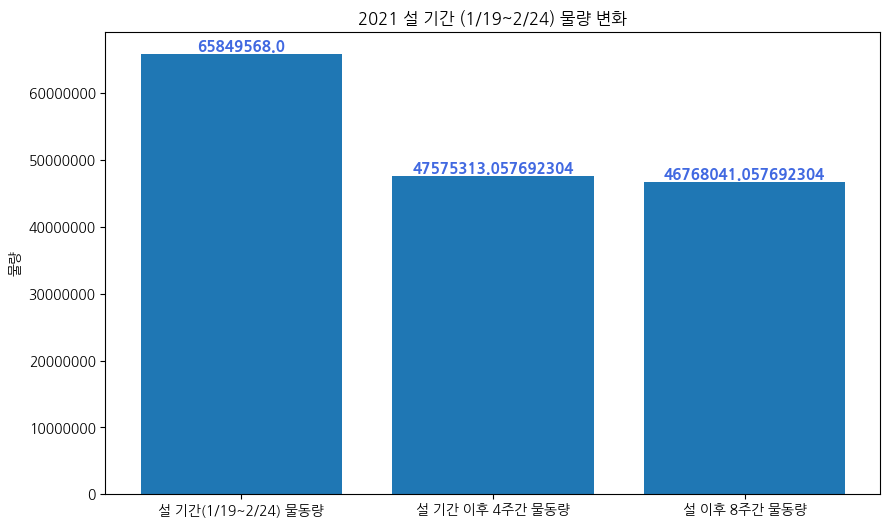

In [ ]:
values = [
    new_year['new_year_total'].values,
    after_4['after_4_total'].values,
    after_8['after_8_total'].values,
    ]


plt.figure(figsize=(10, 6))
x = np.arange(len(values))
plt.bar(x, [val[0] for val in values])
plt.title('2021 설 기간 (1/19~2/24) 물량 변화')



for i, v in enumerate(values):
    plt.text(i, v[0], str(v[0]), fontsize=11, fontweight='bold', color='royalblue', ha='center', va='bottom')

plt.ylabel('물량')
plt.xticks(x, ['설 기간(1/19~2/24) 물동량', '설 기간 이후 4주간 물동량', '설 이후 8주간 물동량'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

#### 21년 추석
- 전 : 8/9 ~ 9/6
- 후 : 10/05 ~ 11/01

In [ ]:
chuseok = whole_21[(whole_21['DL_YMD']>'2021-09-06')&(whole_21['DL_YMD']<'2021-10-04')].copy()
chuseok['chuseok_total']=chuseok['total'].sum()

In [ ]:
after_4 = whole_21[(whole_21['DL_YMD']>'2021-10-04')&(whole_21['DL_YMD']<'2021-11-02')]
before_4 = whole_21[(whole_21['DL_YMD']>'2021-08-08')&(whole_21['DL_YMD']<'2021-09-07')]
after_4['after_4_total']=(after_4['total'].sum()) - mon_21 - tue_21 - wed_21
before_4['before_4_total']=(before_4['total'].sum()) - mon_21 - tue_21 - wed_21

<ipython-input-107-3327a0ffe929>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_4['after_4_total']=(after_4['total'].sum()) - mon_21 - tue_21 - wed_21
<ipython-input-107-3327a0ffe929>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_4['before_4_total']=(before_4['total'].sum()) - mon_21 - tue_21 - wed_21


<ipython-input-109-8b7ee0011e78>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


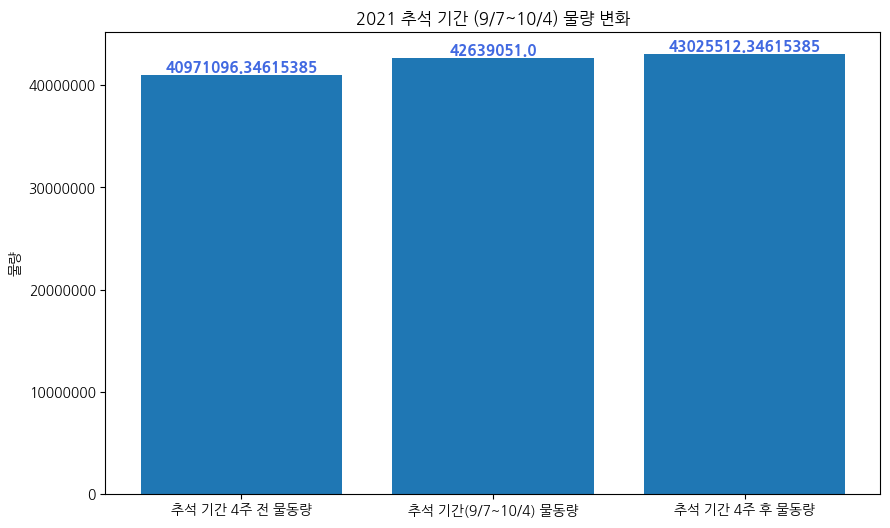

In [ ]:
values = [
    before_4['before_4_total'].values,
    chuseok['chuseok_total'].values,
    after_4['after_4_total'].values,
    ]


plt.figure(figsize=(10, 6))
x = np.arange(len(values))
plt.bar(x, [val[0] for val in values])
plt.title('2021 추석 기간 (9/7~10/4) 물량 변화')



for i, v in enumerate(values):
    plt.text(i, v[0], str(v[0]), fontsize=11, fontweight='bold', color='royalblue', ha='center', va='bottom')

plt.ylabel('물량')
plt.xticks(x, ['추석 기간 4주 전 물동량', '추석 기간(9/7~10/4) 물동량', '추석 기간 4주 후 물동량'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

#### 22년 추석
- 전: 7/30 ~ 8/26
- 후: 9/22 ~ 10/19

In [ ]:
chuseok = whole_22[(whole_22['DL_YMD']>'2022-08-26')&(whole_22['DL_YMD']<'2022-09-22')].copy()
chuseok['chuseok_total']=chuseok['total'].sum()

In [ ]:
after_4 = whole_22[(whole_22['DL_YMD']>'2022-09-21')&(whole_22['DL_YMD']<'2022-10-20')]
before_4 = whole_22[(whole_22['DL_YMD']>'2022-07-29')&(whole_22['DL_YMD']<'2022-08-27')]
after_4['after_4_total']=(after_4['total'].sum()) - fri_22 - sat_22 - sun_22
before_4['before_4_total']=(before_4['total'].sum()) - fri_22 - sat_22 - sun_22

<ipython-input-116-61711ea31ece>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_4['after_4_total']=(after_4['total'].sum()) - fri_22 - sat_22 - sun_22
<ipython-input-116-61711ea31ece>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_4['before_4_total']=(before_4['total'].sum()) - fri_22 - sat_22 - sun_22


<ipython-input-117-efd27e76451e>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


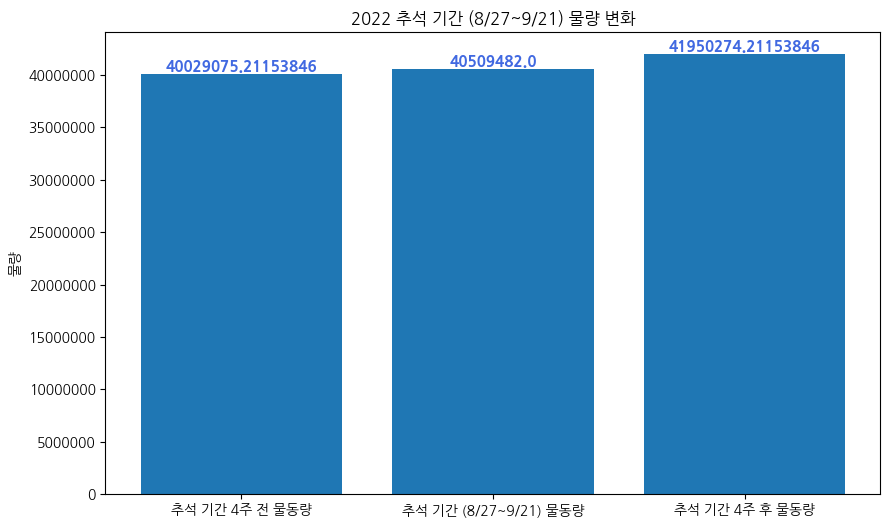

In [ ]:
values = [
    before_4['before_4_total'].values,
    chuseok['chuseok_total'].values,
    after_4['after_4_total'].values,
    ]


plt.figure(figsize=(10, 6))
x = np.arange(len(values))
plt.bar(x, [val[0] for val in values])
plt.title('2022 추석 기간 (8/27~9/21) 물량 변화')



for i, v in enumerate(values):
    plt.text(i, v[0], str(v[0]), fontsize=11, fontweight='bold', color='royalblue', ha='center', va='bottom')

plt.ylabel('물량')
plt.xticks(x, ['추석 기간 4주 전 물동량', '추석 기간 (8/27~9/21) 물동량', '추석 기간 4주 후 물동량'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

#### 23년 설
- 전: 12/11 ~ 1/7
- 후: 2/3 ~ 3/2

In [ ]:
new_year = whole_23[(whole_23['DL_YMD']>'2023-01-07')&(whole_23['DL_YMD']<'2023-02-03')].copy()
new_year['new_year_total']=new_year['total'].sum()

In [137]:
after_4 = whole_23[(whole_23['DL_YMD']>'2023-02-02')&(whole_23['DL_YMD']<'2023-03-03')]
before_4_23 = whole_23[(whole_23['DL_YMD'] < '2023-01-08')]
before_4_22 = whole_22[whole_22['DL_YMD'] > '2022-12-10']
after_4['after_4_total']=(after_4['total'].sum()) - mon_23 - sat_23 - sun_23 - tue_23
before_4 = pd.concat([before_4_22, before_4_23])
before_4['before_4_total']=(before_4['total'].sum()) - mon_22 - sat_22 - sun_22 - tue_22

<ipython-input-137-800e109548fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_4['after_4_total']=(after_4['total'].sum()) - mon_23 - sat_23 - sun_23 - tue_23


<ipython-input-140-8ba85416f46a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


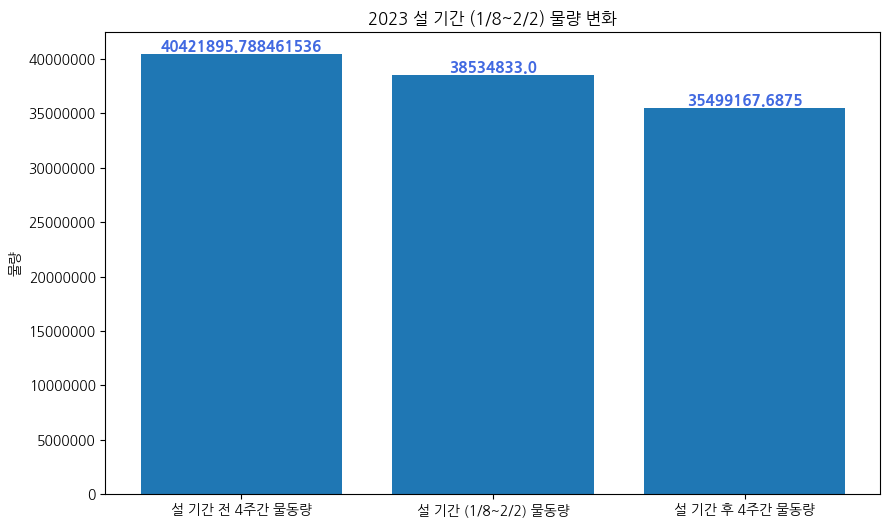

In [140]:
values = [
    before_4['before_4_total'].values,
    new_year['new_year_total'].values,
    after_4['after_4_total'].values,
    ]


plt.figure(figsize=(10, 6))
x = np.arange(len(values))
plt.bar(x, [val[0] for val in values])
plt.title('2023 설 기간 (1/8~2/2) 물량 변화')



for i, v in enumerate(values):
    plt.text(i, v[0], str(v[0]), fontsize=11, fontweight='bold', color='royalblue', ha='center', va='bottom')


plt.ylabel('물량')
plt.xticks(x, ['설 기간 전 4주간 물동량', '설 기간 (1/8~2/2) 물동량', '설 기간 후 4주간 물동량'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()